In [1]:
#GENERATING SOME RANDOM DATASET USING RANDOM FUNCTION AND APPLYING LINEAR REGRESSION
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
def create_dataset(hm,variance,step=2,correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val+=step
        elif correlation and correlation =='neg':
            val-=step
    xs=[i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)

In [3]:
xs,ys=create_dataset(40, 10, 2 ,correlation='pos')

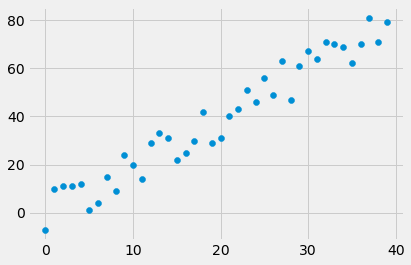

In [4]:
plt.scatter(xs,ys)
plt.show()

In [5]:
#HERE WE ARE DEFINING THE FUNCTION
def best_fit_slope(xs,ys):
    m=( ((mean(xs)*mean(ys))-mean(xs*ys)) / ((mean(xs)**2)- (mean(xs**2))) )
    return m

In [6]:
m=best_fit_slope(xs,ys)

In [7]:
m

2.0330206378986873

In [8]:
#HERE WE ARE CALCULATING THE INTERCEPT
def best_intercept(xs,ys):
    b=mean(ys)-m*mean(xs)
    return b

In [9]:
b=best_intercept(xs,ys)
b

-0.7439024390244029

In [10]:
#best fit line
regression_line=[(m*x)+b for x in xs]
#we can also do in this way
#for x in xs
#   regression_line.append((m*x)+b)

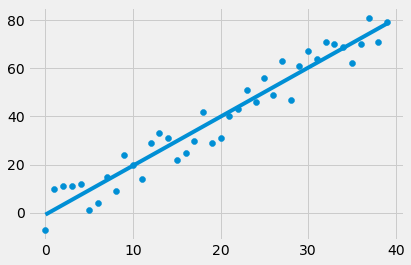

In [11]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [12]:
#for simple prediction for single value
predict_x=8
predict_y=((m*predict_x)+b)

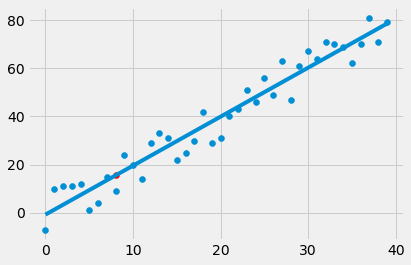

In [13]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.scatter(predict_x,predict_y,color="red")
plt.show()

In [14]:
#Now it is predicting for group of values.
predict_x=[8,5,3.3,6,5.99,3.98,7,5.65]
predict_y=[((m*x)+b) for x in (predict_x)]

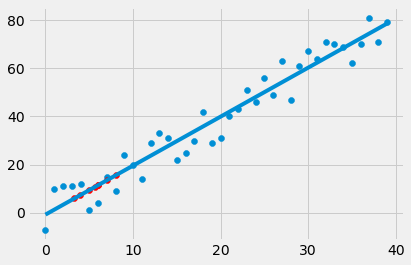

In [15]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.scatter(predict_x,predict_y,color="red")
plt.show()

In [16]:
#testing accuracy
def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2)

In [17]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line=[mean(ys_orig) for y in ys_orig]
    squared_error_regr=squared_error(ys_orig,ys_line)
    squared_error_y_mean=squared_error(ys_orig,y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [18]:
r_squared=coefficient_of_determination(ys,regression_line)

In [19]:
r_squared

0.93969405860320809